### Author: Allan R. Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@proton.me 
### Start Date: 2024-12-01 
### Last Updated:2025-16-08

---

# 1.0 Introduction 

This project aims to analyze vehicle advertisements in the United States to uncover meaningful insights and trends. The process involves cleaning and preprocessing the dataset, performing exploratory data analysis, creating compelling visualizations, and conducting statistical evaluations. The findings will serve as the foundation for developing and deploying a user-friendly web application. 

**Project Workflow**

1. **Data Import and Overview**: Load the dataset and perform an initial examination to understand its structure and contents.
2. **Data Cleaning and Preprocessing**: Address missing values, correct data types, and reformat columns for consistency and usability.
3. **Exploratory Data Analysis (EDA)**: Investigate the dataset to identify patterns, relationships, and anomalies.
4. **Feature Engineering**: Create new columns, such as vehicle age and age categories, to enhance the analysis.
5. **Visualization**: Generate charts and graphs to visually represent key findings and trends.
6. **Statistical Analysis**: Perform statistical evaluations to derive deeper insights into the data.
7. **Web Application Development**: Utilize the insights to design and deploy a web application for end-user interaction. 

---

### 1.1 Data Import and Overview 

First we'll import some libraries. For this project I'll be using pandas, plotly.express, matplotlib, and numpy. Then we'll import the dfset itself and afterward print the dfframe to have a quick overview.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib as plt

df = pd.read_csv("vehicles_us.csv")

print(f'DataFrame Shape: {df.shape}')
display(df.head())

DataFrame Shape: (51525, 13)


price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

Immediately I see a few issues: 
1. Model year and odometer are both floats instead of ints. While it's not crucial to change this, I'll change it to match standard. 
2. There are NaNs in the DF. 

---

### 1.2 Data Overview 

 Column Descriptions:

- **price**: The price of the vehicle in USD.
- **model_year**: The year the vehicle model was manufactured.
- **model**: The specific model of the vehicle, including the manufacturer and model name.
- **condition**: The condition of the vehicle (e.g., excellent, good, fair, etc.).
- **cylinders**: The number of cylinders in the vehicle's engine.
- **fuel**: The type of fuel the vehicle uses (e.g., gas, diesel, etc.).
- **odometer**: The mileage of the vehicle in miles.
- **transmission**: The type of transmission (e.g., automatic, manual).
- **type**: The category or type of vehicle (e.g., sedan, SUV, pickup).
- **paint_color**: The color of the vehicle's exterior paint.
- **is_4wd**: Indicates whether the vehicle has four-wheel drive (1 if true, NaN if false).
- **date_posted**: The date the advertisement for the vehicle was posted.
- **days_listed**: The number of days the vehicle was listed for sale. 

---
---

# 2.0 Exploratory Data Analysis 

For this portion, we'll begin by splitting the "model" column into a "manufacturer" and "model" column by taking the first element in the string of a cell (e.g., if the vehicle is a "nissan altima", we'll split it so that we extract "nissan" and put it into the new "manufacturer column"). Since splitting the column doesn't delete the first element of the string (e.g. with our "nissan altima" example, it would still say "nissan altima" instead of just "altima" in the "model column"), we'll redefine the model column by spitting all elements after the fist element and joining it with the space (' ') preceding it. 

We'll capitalize the first letter of each string in the two aforementioned columns and then move the 'manufacturer' column in front of the 'model' column because:

A. It visually looks a little nicer and

B. It's more intuitive to have 'manufacturer' and 'model' juxtaposed as opposed to the former's current position. 

In [ ]:
# Creating a 'manufacturer' column by splitting initial element from 'Model' column
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])
# Removing initial element from strings in 'Model'
df['model'] = df['model'].apply(lambda x: ' '.join(x.split()[1:]))

---

#### 2.1 NaNs, Unique Values, and Duplicates 

In [3]:
# Checking for missing values and column dtypes
print(f'NaN values:')
print(df.isna().sum())
print('\n', f'dtypes:')
print(df.dtypes)

NaN values:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
manufacturer        0
dtype: int64

 dtypes:
price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
manufacturer     object
dtype: object


In [4]:
# Counting unique values in each column
for col in df.columns:
    unique_values = df.nunique()
    print(f"{col}: {unique_values[col]}")

price: 3443
model_year: 68
model: 100
condition: 6
cylinders: 7
fuel: 5
odometer: 17762
transmission: 3
type: 13
paint_color: 12
is_4wd: 1
date_posted: 354
days_listed: 227
manufacturer: 19


In [5]:
# Checking for duplicates
has_duplicates = df.duplicated().any()
print(has_duplicates)

False


In [6]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median())

df['cylinders'] = df.groupby('model')['cylinders'].fillna(df['cylinders'].median())

df['odometer'] = df.groupby('model')['odometer'].fillna(df['odometer'].median())

df['paint_color'] = df['paint_color'].fillna('Unknown')

C:\Users\vande\AppData\Local\Temp\ipykernel_16740\2002102053.py:3: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['cylinders'] = df.groupby('model')['cylinders'].fillna(df['cylinders'].median())
C:\Users\vande\AppData\Local\Temp\ipykernel_16740\2002102053.py:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['odometer'] = df.groupby('model')['odometer'].fillna(df['odometer'].median())


---

### 2.2 Reformatting 
Renaming all columns and moving 'Manufacturer' to be between 'Year' and 'Model'.

In [7]:

df = df.rename(columns= {'price': 'Price (USD)', 
                         'model_year': 'Model Year', 
                         'model': 'Model', 
                         'condition': 'Condition', 
                         'cylinders': 'Cylinders', 
                         'fuel': 'Fuel', 
                         'odometer': 'Odometer', 
                         'transmission': 'Transmission', 
                         'type': 'Type', 
                         'paint_color': 'Paint Color', 
                         'is_4wd': '4WD', 
                         'date_posted': 'Date Posted', 
                         'days_listed': 'Days Listed', 
                         'manufacturer': 'Manufacturer'
                         })

# Switching column order
df = df[['Price (USD)', 
         'Model Year',
         'Manufacturer',  
         'Model', 
         'Condition', 
         'Cylinders', 
         'Fuel', 
         'Odometer', 
         'Transmission', 
         'Type', 
         'Paint Color', 
         '4WD', 
         'Date Posted', 
         'Days Listed'
         ]]


---

### 2.3 String Capitalization 

In [8]:
# Capitalizing first letter of all strings
for col in ['Manufacturer', 'Model']: 
    df['Manufacturer'] = df['Manufacturer'].str.capitalize()
    df['Model'] = df['Model'].str.capitalize()

df

Price (USD)  Model Year Manufacturer    Model  Condition  Cylinders  \
0             9400      2011.0          Bmw       X5       good        6.0   
1            25500      2011.0         Ford    F-150       good        6.0   
2             5500      2013.0      Hyundai   Sonata   like new        4.0   
3             1500      2003.0         Ford    F-150       fair        8.0   
4            14900      2017.0     Chrysler      200  excellent        4.0   
...            ...         ...          ...      ...        ...        ...   
51520         9249      2013.0       Nissan   Maxima   like new        6.0   
51521         2700      2002.0        Honda    Civic    salvage        4.0   
51522         3950      2009.0      Hyundai   Sonata  excellent        4.0   
51523         7455      2013.0       Toyota  Corolla       good        4.0   
51524         6300      2014.0       Nissan   Altima       good        4.0   

      Fuel  Odometer Transmission    Type Paint Color  4WD Date Posted  \
0      gas  145000.0    automatic     SUV     Unknown  1.0  2018-06-23   
1      gas   88705.0    automatic  pickup       white  1.0  2018-10-19   
2      gas  110000.0    automatic   sedan         red  NaN  2019-02-07   
3      gas  113000.0    automatic  pickup     Unknown  NaN  2019-03-22   
4      gas   80903.0    automatic   sedan       black  NaN  2019-04-02   
...    ...       ...          ...     ...         ...  ...         ...   
51520  gas   88136.0    automatic   sedan       black  NaN  2018-10-03   
51521  gas  181500.0    automatic   sedan       white  NaN  2018-11-14   
51522  gas  128000.0    automatic   sedan        blue  NaN  2018-11-15   
51523  gas  139573.0    automatic   sedan       black  NaN  2018-07-02   
51524  gas  113000.0    automatic   sedan     Unknown  NaN  2018-06-05   

       Days Listed  
0               19  
1               50  
2               79  
3                9  
4               28  
...            ...  
51520           37  
51521           22  
51522           32  
51523           71  
51524           10  

[51525 rows x 14 columns]

---

### 2.4 Manufacturer Uppercase 

At a glance I can see that BMW is not properly capitalized in the 'Manufacturer' column (currently it says 'Bwm'), so let's see if there are other brands that are not properly capitalized.

In [9]:
df['Manufacturer'].unique()

array(['Bmw', 'Ford', 'Hyundai', 'Chrysler', 'Toyota', 'Honda', 'Kia',
       'Chevrolet', 'Ram', 'Gmc', 'Jeep', 'Nissan', 'Subaru', 'Dodge',
       'Mercedes-benz', 'Acura', 'Cadillac', 'Volkswagen', 'Buick'],
      dtype=object)

There is indeed another manufacturer not capitalized: GMC. To fix this and Bmw as well, let's define a function called 'convert_to_uppercase' and give it the parameters 'row' and 'string'. We'll pass an 'if' statement that can basically be interpreted as "If the given row is the same as whatever object is set to the string variable (in this case, the incorrectly spelled "BMW" and "GMC"), change the entire string to uppercase".

In [10]:
# Creating the uppercase function
def convert_to_uppercase(row, string): 
    if row == string: 
        return row.upper() 
    return row

# Apply to 'Bmw'
string = 'Bmw' 
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: convert_to_uppercase(x, string))

# Apply to 'Gmc'
string = 'Gmc'
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: convert_to_uppercase(x, string))

df['Manufacturer']

0             BMW
1            Ford
2         Hyundai
3            Ford
4        Chrysler
           ...   
51520      Nissan
51521       Honda
51522     Hyundai
51523      Toyota
51524      Nissan
Name: Manufacturer, Length: 51525, dtype: object

---

### 2.5 Model Age
Next we'll create an 'Age' column to use in our analysis. Since the current year as of writing this is 2025, we'll subtract the 'Model Year' column from said year to obtain df['Age'].

Then we'll group 'Age' into categories so that the user can filter them. To do this, we'll first define a function called 'age_category' and give it one parameter: 'x'. Then we'll create a conditional that defines the groupings we desire: cars less than 5 yrs. old, 5-10 years old, 10-20 years old, and finally 20 years or older. Finally, we'll create an 'Age Category' column that will take the 'Age' column and have the ".apply" method called on it, then pass it the arugment 'age_category, which is the function we recently defined.

In [11]:
# Current year is 2025, so we subtract said year from the model year to obtain the age of the vehicle
df['Age'] = 2025 - df['Model Year']

df.head()

Price (USD)  Model Year Manufacturer   Model  Condition  Cylinders Fuel  \
0         9400      2011.0          BMW      X5       good        6.0  gas   
1        25500      2011.0         Ford   F-150       good        6.0  gas   
2         5500      2013.0      Hyundai  Sonata   like new        4.0  gas   
3         1500      2003.0         Ford   F-150       fair        8.0  gas   
4        14900      2017.0     Chrysler     200  excellent        4.0  gas   

   Odometer Transmission    Type Paint Color  4WD Date Posted  Days Listed  \
0  145000.0    automatic     SUV     Unknown  1.0  2018-06-23           19   
1   88705.0    automatic  pickup       white  1.0  2018-10-19           50   
2  110000.0    automatic   sedan         red  NaN  2019-02-07           79   
3  113000.0    automatic  pickup     Unknown  NaN  2019-03-22            9   
4   80903.0    automatic   sedan       black  NaN  2019-04-02           28   

    Age  
0  14.0  
1  14.0  
2  12.0  
3  22.0  
4   8.0

In [12]:
# Creating a function to sort vehicles into discrete groupings
def age_category(x): 
    if x < 5: 
        return '<5'
    elif x >= 5 and x < 10: 
        return '5-10'
    elif x >= 10 and x < 20: 
        return '10-20'
    else: 
        return '>20'
    

# Creating the 'Age Category' column by taking the 'Age' column and using the apply method with the previously created function 'age_category' as its parameter.
df['Age Category'] = df['Age'].apply(age_category)

df.head()

Price (USD)  Model Year Manufacturer   Model  Condition  Cylinders Fuel  \
0         9400      2011.0          BMW      X5       good        6.0  gas   
1        25500      2011.0         Ford   F-150       good        6.0  gas   
2         5500      2013.0      Hyundai  Sonata   like new        4.0  gas   
3         1500      2003.0         Ford   F-150       fair        8.0  gas   
4        14900      2017.0     Chrysler     200  excellent        4.0  gas   

   Odometer Transmission    Type Paint Color  4WD Date Posted  Days Listed  \
0  145000.0    automatic     SUV     Unknown  1.0  2018-06-23           19   
1   88705.0    automatic  pickup       white  1.0  2018-10-19           50   
2  110000.0    automatic   sedan         red  NaN  2019-02-07           79   
3  113000.0    automatic  pickup     Unknown  NaN  2019-03-22            9   
4   80903.0    automatic   sedan       black  NaN  2019-04-02           28   

    Age Age Category  
0  14.0        10-20  
1  14.0        10-20  
2  12.0        10-20  
3  22.0          >20  
4   8.0         5-10

---
---

# 3.0 Statistical Analysis 

### 3.1 Price 

In [13]:
# I'm curious about the distribution of car prices.
df['Price (USD)'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: Price (USD), dtype: float64

In [14]:
price_distribution = px.histogram(df, 
                                  x= 'Price (USD)', 
                                  title= 'Distribution of Car Prices', 
                                  color_discrete_sequence= px.colors.qualitative.Plotly)

price_distribution.update_layout(title= {'x': 0.5})

price_distribution

Well there are certainly some MAJOR outliers ...

<Axes: title={'center': 'Average price by manufacturer'}, xlabel='Manufacturer', ylabel='Price (USD)'>

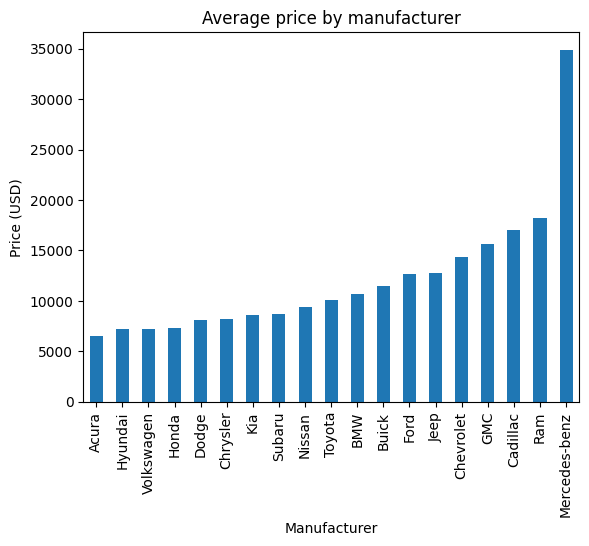

In [15]:
# What's average price per manufacturer?
df.groupby('Manufacturer')['Price (USD)'].mean().sort_values(ascending= True).plot(kind= 'bar', 
                                                                             xlabel= 'Manufacturer', 
                                                                             ylabel= 'Price (USD)', 
                                                                             title= 'Average price by manufacturer', 
                                                                             )

---

### 3.2 Year 

In [16]:
condition_count = df.groupby('Condition')['Condition'].count()
condition_count

Condition
excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: Condition, dtype: int64

<Axes: title={'center': 'Amount of Vehicles in a Certain Condition'}, xlabel='Condition', ylabel='Vehicle Count'>

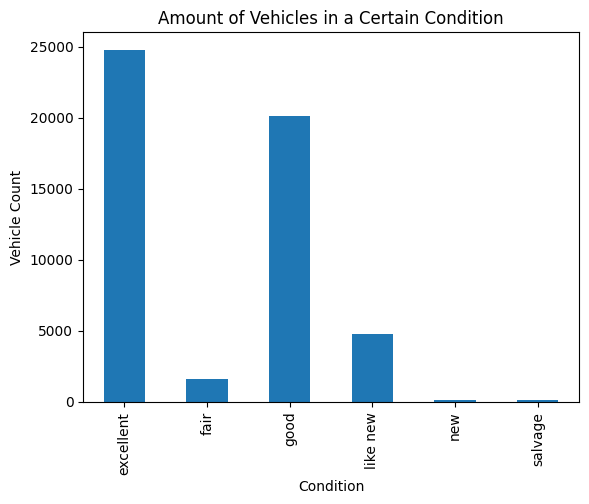

In [17]:
# Creating bar graph sorting 'condition' and comparing vehicle counts between the sorted values
condition_count.plot(kind='bar', 
                     title='Amount of Vehicles in a Certain Condition', 
                     xlabel= 'Condition', 
                     ylabel= 'Vehicle Count')

In [18]:
df

Price (USD)  Model Year Manufacturer    Model  Condition  Cylinders  \
0             9400      2011.0          BMW       X5       good        6.0   
1            25500      2011.0         Ford    F-150       good        6.0   
2             5500      2013.0      Hyundai   Sonata   like new        4.0   
3             1500      2003.0         Ford    F-150       fair        8.0   
4            14900      2017.0     Chrysler      200  excellent        4.0   
...            ...         ...          ...      ...        ...        ...   
51520         9249      2013.0       Nissan   Maxima   like new        6.0   
51521         2700      2002.0        Honda    Civic    salvage        4.0   
51522         3950      2009.0      Hyundai   Sonata  excellent        4.0   
51523         7455      2013.0       Toyota  Corolla       good        4.0   
51524         6300      2014.0       Nissan   Altima       good        4.0   

      Fuel  Odometer Transmission    Type Paint Color  4WD Date Posted  \
0      gas  145000.0    automatic     SUV     Unknown  1.0  2018-06-23   
1      gas   88705.0    automatic  pickup       white  1.0  2018-10-19   
2      gas  110000.0    automatic   sedan         red  NaN  2019-02-07   
3      gas  113000.0    automatic  pickup     Unknown  NaN  2019-03-22   
4      gas   80903.0    automatic   sedan       black  NaN  2019-04-02   
...    ...       ...          ...     ...         ...  ...         ...   
51520  gas   88136.0    automatic   sedan       black  NaN  2018-10-03   
51521  gas  181500.0    automatic   sedan       white  NaN  2018-11-14   
51522  gas  128000.0    automatic   sedan        blue  NaN  2018-11-15   
51523  gas  139573.0    automatic   sedan       black  NaN  2018-07-02   
51524  gas  113000.0    automatic   sedan     Unknown  NaN  2018-06-05   

       Days Listed   Age Age Category  
0               19  14.0        10-20  
1               50  14.0        10-20  
2               79  12.0        10-20  
3                9  22.0          >20  
4               28   8.0         5-10  
...            ...   ...          ...  
51520           37  12.0        10-20  
51521           22  23.0          >20  
51522           32  16.0        10-20  
51523           71  12.0        10-20  
51524           10  11.0        10-20  

[51525 rows x 16 columns]

--- 
---

# 4.0 Misc. 

In [19]:
fig = px.parallel_coordinates(df, color_continuous_scale= px.colors.diverging.RdYlGn, color_continuous_midpoint= 2)

fig

In [20]:
df["Price (USD)"].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: Price (USD), dtype: float64

In [21]:
# Correlation between age and odometer
fig5 = px.line(df, 
               x= "Price (USD)", 
               y= "Odometer"
               )

fig5

---
---